# **Convolutional Neural Networks**

In [267]:
import cv2  # opencv library
from PIL import Image # pillow
import numpy as np
import os
import matplotlib.pyplot as plt

In [268]:
pwd


'c:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning'

In [269]:
ls

 Volume in drive C is Windows
 Volume Serial Number is E26E-0A81

 Directory of c:\Users\Arham\OneDrive\Desktop\Industrial_Training\Deep_Learning

27-05-2024  13:41    <DIR>          .
27-05-2024  13:47    <DIR>          ..
25-05-2024  15:25           206,733 ANN.ipynb
27-05-2024  15:29         7,305,314 CNN.ipynb
25-05-2024  15:12            10,957 confusion_matrix.png
27-05-2024  13:33    <DIR>          Data
25-05-2024  15:08            83,384 loan_approval.h5
24-05-2024  13:23           384,337 loan_approval_dataset.csv
25-05-2024  15:19             1,447 Standard_Scaler.lb
               6 File(s)      7,992,172 bytes
               3 Dir(s)   6,323,953,664 bytes free


# Loading an image

In [270]:
path = r'C:\Users\Arham\OneDrive\Desktop\Industrial_Training\Deep_Learning\Data\images\cats\cat_1.jpg'

In [271]:
cat = Image.open(path)

In [272]:
cat

In [273]:
cat_img = np.array(cat)  # pixels of the image in 3-D array

In [274]:
cat_img

array([[[ 94, 143, 158],
        [ 94, 143, 158],
        [ 97, 143, 159],
        ...,
        [ 83, 147, 159],
        [ 84, 148, 160],
        [ 85, 149, 161]],

       [[ 92, 141, 156],
        [ 93, 142, 157],
        [ 96, 142, 158],
        ...,
        [ 82, 146, 158],
        [ 84, 148, 160],
        [ 84, 148, 160]],

       [[ 90, 139, 154],
        [ 91, 140, 155],
        [ 94, 140, 155],
        ...,
        [ 82, 146, 158],
        [ 83, 147, 159],
        [ 84, 148, 160]],

       ...,

       [[ 43,  45,  42],
        [ 40,  45,  41],
        [ 41,  43,  40],
        ...,
        [ 58,  43,  40],
        [ 58,  43,  40],
        [ 58,  43,  40]],

       [[ 38,  40,  37],
        [ 35,  40,  36],
        [ 35,  37,  34],
        ...,
        [ 53,  38,  35],
        [ 51,  36,  33],
        [ 50,  35,  32]],

       [[ 35,  35,  35],
        [ 34,  36,  35],
        [ 35,  35,  35],
        ...,
        [ 54,  39,  36],
        [ 53,  38,  35],
        [ 58,  43,  40]]

In [275]:
cat_img.shape  # ( height_of_img , width_of_img, channel)

(769, 615, 3)

There are three channels in color images: 
1. Red Channel  
2. Green Channel  
3. Blue Channel





In [276]:
img_directory_path = r'C:\Users\Arham\OneDrive\Desktop\Industrial_Training\Deep_Learning\Data\images'

In [277]:
path_dict = {'cats' : [], 'dogs' : []}
for dir in os.listdir(img_directory_path):
    directory_path = os.path.join(img_directory_path, dir)
    for img in os.listdir(directory_path):
        image_path = os.path.join(directory_path,img)
        path_dict[dir].append(image_path)

In [278]:
path_dict

{'cats': ['C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_1.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_10.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_100.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_101.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_102.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_103.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_104.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_106.jpg',
  'C:\\Users\\Arham\\OneDrive\\Desktop\\Industrial_Training\\Deep_Learning\\Data\\images\\cats\\cat_109.jpg',
  'C:

In [279]:

Image.open(path_dict['dogs'][2])

In [280]:
Image.open(path_dict['cats'][17])

We need all images in same shape/size.

In [281]:
img_45 = cv2.imread(path_dict['dogs'][45]) # provides the 3-D array of our image
print(img_45.shape)
img_45

(720, 1280, 3)


array([[[ 14,  73, 113],
        [ 14,  73, 113],
        [ 12,  73, 113],
        ...,
        [ 30,  89, 134],
        [ 35,  94, 139],
        [ 42, 101, 146]],

       [[ 14,  73, 113],
        [ 14,  73, 113],
        [ 12,  73, 113],
        ...,
        [ 30,  89, 134],
        [ 35,  94, 139],
        [ 42, 101, 146]],

       [[ 14,  73, 113],
        [ 14,  73, 113],
        [ 12,  73, 113],
        ...,
        [ 30,  89, 134],
        [ 34,  93, 138],
        [ 42, 101, 146]],

       ...,

       [[130, 208, 231],
        [130, 208, 231],
        [130, 208, 231],
        ...,
        [143, 210, 237],
        [143, 210, 237],
        [143, 210, 237]],

       [[130, 208, 231],
        [130, 208, 231],
        [130, 208, 231],
        ...,
        [143, 210, 237],
        [143, 210, 237],
        [143, 210, 237]],

       [[130, 208, 231],
        [130, 208, 231],
        [130, 208, 231],
        ...,
        [143, 210, 237],
        [143, 210, 237],
        [143, 210, 237]]

In [282]:
resized_img = cv2.resize(img_45, (224,224))
print(img_45.shape)
print(resized_img.shape)

(720, 1280, 3)
(224, 224, 3)


Before resizing

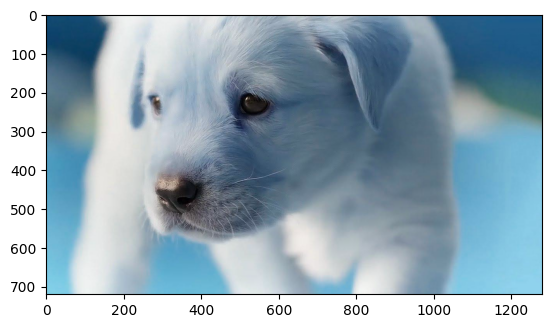

In [283]:
plt.imshow(img_45)

After Resizing

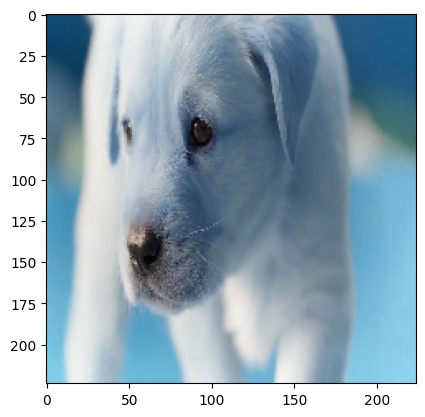

In [284]:
plt.imshow(resized_img)

Resizing all images

In [285]:
x = []
y = []

for key, values in path_dict.items():
    for img_path in values:
        img_arr = cv2.imread(img_path)
        resized_image = cv2.resize(img_arr, (224,224))
        x.append(resized_img)
        y.append(key)

In [286]:
len(x) , len(y)

(697, 697)

In [287]:
x = np.array(x)

In [288]:
type(x)

numpy.ndarray

In [289]:
x  # 4-D array

array([[[[ 12,  73, 113],
         [ 13,  75, 115],
         [ 22,  73, 115],
         ...,
         [ 35,  94, 139],
         [ 35,  94, 139],
         [ 31,  90, 135]],

        [[ 12,  73, 113],
         [ 12,  73, 114],
         [ 21,  72, 114],
         ...,
         [ 34,  93, 138],
         [ 34,  93, 138],
         [ 30,  89, 134]],

        [[ 12,  73, 113],
         [ 12,  74, 114],
         [ 21,  72, 114],
         ...,
         [ 31,  92, 138],
         [ 31,  92, 138],
         [ 28,  89, 135]],

        ...,

        [[130, 208, 232],
         [131, 209, 232],
         [131, 209, 232],
         ...,
         [143, 210, 237],
         [143, 210, 237],
         [143, 210, 237]],

        [[130, 208, 231],
         [130, 208, 231],
         [130, 208, 231],
         ...,
         [143, 210, 237],
         [143, 210, 237],
         [143, 210, 237]],

        [[130, 208, 231],
         [129, 207, 230],
         [129, 207, 230],
         ...,
         [143, 210, 237],
        

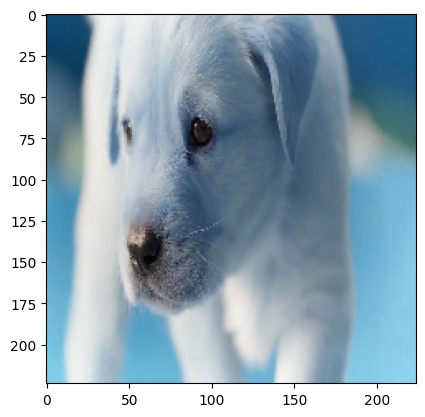

In [290]:
plt.imshow(x[0])

# Normalizing the pixel values in between 0 to 1 

We normalize the values of pixel so as to reduce the computation power

In [291]:
x[0]/255.0

array([[[0.04705882, 0.28627451, 0.44313725],
        [0.05098039, 0.29411765, 0.45098039],
        [0.08627451, 0.28627451, 0.45098039],
        ...,
        [0.1372549 , 0.36862745, 0.54509804],
        [0.1372549 , 0.36862745, 0.54509804],
        [0.12156863, 0.35294118, 0.52941176]],

       [[0.04705882, 0.28627451, 0.44313725],
        [0.04705882, 0.28627451, 0.44705882],
        [0.08235294, 0.28235294, 0.44705882],
        ...,
        [0.13333333, 0.36470588, 0.54117647],
        [0.13333333, 0.36470588, 0.54117647],
        [0.11764706, 0.34901961, 0.5254902 ]],

       [[0.04705882, 0.28627451, 0.44313725],
        [0.04705882, 0.29019608, 0.44705882],
        [0.08235294, 0.28235294, 0.44705882],
        ...,
        [0.12156863, 0.36078431, 0.54117647],
        [0.12156863, 0.36078431, 0.54117647],
        [0.10980392, 0.34901961, 0.52941176]],

       ...,

       [[0.50980392, 0.81568627, 0.90980392],
        [0.51372549, 0.81960784, 0.90980392],
        [0.51372549, 0

In [292]:
x2 = x/255.0

In [293]:
y

['cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 'cats',
 

In [294]:
for i in range(len(y)):
    if y[i] == 'cats':
        y[i]=1
    else:
        y[i]=0

In [295]:
y

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


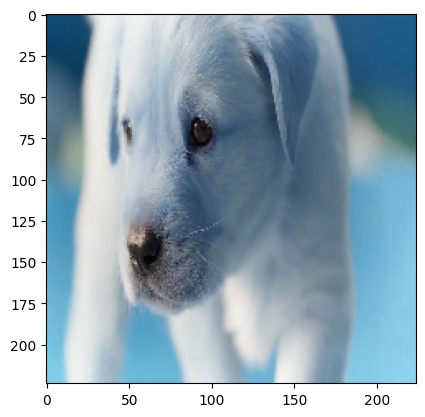

In [298]:
plt.imshow(x[0])